In [146]:
# !pip install -U scikit-learn

## 2.Dataset Exploration (10%)

In [147]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import collections
from sklearn.linear_model import LinearRegression, Lasso, Ridge, SGDRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, accuracy_score
from sklearn import datasets
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import Normalizer, MinMaxScaler, StandardScaler, PolynomialFeatures, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn import metrics
from sklearn.svm import SVC
import matplotlib.gridspec as gridspec
from mlxtend.plotting import plot_decision_regions
from mlxtend.preprocessing import shuffle_arrays_unison
from tqdm.notebook import tqdm_notebook as tqdm
from sklearn import svm
from sklearn.utils import shuffle
from matplotlib.colors import ListedColormap
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix
from sklearn import preprocessing
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix

from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD, Adam

import seaborn as sns
import random
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, roc_curve, roc_auc_score

from sklearn import linear_model
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn import model_selection
from sklearn import linear_model
from sklearn import metrics
from sklearn.metrics import precision_score, recall_score, f1_score
import pandas as pd
import numpy as np
import sklearn.linear_model as skl_lm
import matplotlib.pyplot as plt

In [148]:
df_full=pd.read_csv('/content/mhealth_raw_data.csv')
df_full

,alx,aly,alz,glx,gly,glz,arx,ary,arz,grx,gry,grz,Activity,subject
0,2.1849,-9.6967,0.63077,0.103900,-0.84053,-0.68762,-8.6499,-4.5781,0.187760,-0.449020,-1.01030,0.034483,0,subject1
1,2.3876,-9.5080,0.68389,0.085343,-0.83865,-0.68369,-8.6275,-4.3198,0.023595,-0.449020,-1.01030,0.034483,0,subject1
2,2.4086,-9.5674,0.68113,0.085343,-0.83865,-0.68369,-8.5055,-4.2772,0.275720,-0.449020,-1.01030,0.034483,0,subject1
3,2.1814,-9.4301,0.55031,0.085343,-0.83865,-0.68369,-8.6279,-4.3163,0.367520,-0.456860,-1.00820,0.025862,0,subject1
4,2.4173,-9.3889,0.71098,0.085343,-0.83865,-0.68369,-8.7008,-4.1459,0.407290,-0.456860,-1.00820,0.025862,0,subject1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1215740,1.7849,-9.8287,0.29725,-0.341370,-0.90056,-0.61493,-3.7198,-8.9071,0.294230,0.041176,-0.99384,-0.480600,0,subject10
1215741,1.8687,-9.8766,0.46236,-0.341370,-0.90056,-0.61493,-3.7160,-8.7455,0.448140,0.041176,-0.99384,-0.480600,0,subject10
1215742,1.6928,-9.9290,0.16631,-0.341370,-0.90056,-0.61493,-3.8824,-9.1155,0.450480,0.041176,-0.99384,-0.480600,0,subject10
1215743,1.5279,-9.6306,0.30458,-0.341370,-0.90056,-0.61493,-3.5564,-9.1441,0.594880,0.041176,-0.99384,-0.480600,0,subject10


In [149]:
df_full.head()

,alx,aly,alz,glx,gly,glz,arx,ary,arz,grx,gry,grz,Activity,subject
0,2.1849,-9.6967,0.63077,0.103900,-0.84053,-0.68762,-8.6499,-4.5781,0.187760,-0.44902,-1.0103,0.034483,0,subject1
1,2.3876,-9.5080,0.68389,0.085343,-0.83865,-0.68369,-8.6275,-4.3198,0.023595,-0.44902,-1.0103,0.034483,0,subject1
2,2.4086,-9.5674,0.68113,0.085343,-0.83865,-0.68369,-8.5055,-4.2772,0.275720,-0.44902,-1.0103,0.034483,0,subject1
3,2.1814,-9.4301,0.55031,0.085343,-0.83865,-0.68369,-8.6279,-4.3163,0.367520,-0.45686,-1.0082,0.025862,0,subject1
4,2.4173,-9.3889,0.71098,0.085343,-0.83865,-0.68369,-8.7008,-4.1459,0.407290,-0.45686,-1.0082,0.025862,0,subject1


In [150]:
df_full.describe()

,alx,aly,alz,glx,gly,glz,arx,ary,arz,grx,gry,grz,Activity
count,1.215745e+06,1.215745e+06,1.215745e+06,1.215745e+06,1.215745e+06,1.215745e+06,1.215745e+06,1.215745e+06,1.215745e+06,1.215745e+06,1.215745e+06,1.215745e+06,1.215745e+06
mean,1.494200e+00,-9.692878e+00,-9.548056e-01,-1.598951e-03,-6.166318e-01,-1.587811e-01,-3.713413e+00,-5.805526e+00,2.393880e+00,-2.761061e-01,-4.664340e-01,2.666335e-01,1.741465e+00
std,3.826485e+00,4.171303e+00,5.461803e+00,4.912172e-01,3.546406e-01,5.467979e-01,4.763586e+00,5.757639e+00,3.876503e+00,5.276888e-01,5.555510e-01,5.643804e-01,3.283679e+00
min,-2.214600e+01,-1.961900e+01,-1.937300e+01,-2.146600e+00,-7.789900e+00,-2.626700e+00,-2.236100e+01,-1.897200e+01,-1.823900e+01,-8.339200e+00,-3.570800e+00,-2.689700e+00,0.000000e+00
25%,1.413100e-01,-1.020100e+01,-2.649400e+00,-4.359900e-01,-8.180100e-01,-5.933200e-01,-6.076000e+00,-9.404200e+00,1.296500e-01,-7.058800e-01,-8.973300e-01,-2.370700e-01,0.000000e+00
50%,1.308900e+00,-9.670300e+00,-1.645600e-02,-1.484200e-02,-7.073200e-01,-1.905700e-01,-2.977600e+00,-7.461500e+00,1.928100e+00,-3.549000e-01,-6.345000e-01,3.017200e-01,0.000000e+00
75%,2.575800e+00,-9.042200e+00,1.301300e+00,4.489800e-01,-5.403400e-01,3.222000e-01,-1.193700e+00,-2.533900e+00,4.914700e+00,9.607800e-02,-1.067800e-01,7.780200e-01,2.000000e+00
max,2.005400e+01,2.116100e+01,2.501500e+01,6.048400e+01,2.011300e+00,2.770100e+00,1.986400e+01,2.219100e+01,2.574100e+01,3.319600e+00,1.556500e+00,2.750000e+00,1.200000e+01


In [151]:
df_full.shape

(1215745, 14)

In [152]:
df = df_full.groupby('Activity').apply(lambda x: x.sample(n=1000))
df = df.sample(frac=1).reset_index(drop=True)

In [153]:
df.shape

(13000, 14)

In [154]:
df['Activity'].value_counts()

Activity
9     1000
11    1000
8     1000
10    1000
2     1000
5     1000
4     1000
12    1000
3     1000
1     1000
6     1000
7     1000
0     1000
Name: count, dtype: int64

In [155]:
# # 160745
# # 6745
# df = df_full.iloc[:60745]

In [156]:
df.shape

(13000, 14)

In [157]:
X = df.drop(['Activity', 'subject'], axis=1)
y = df['Activity']

In [158]:
df['Activity'].value_counts()

Activity
9     1000
11    1000
8     1000
10    1000
2     1000
5     1000
4     1000
12    1000
3     1000
1     1000
6     1000
7     1000
0     1000
Name: count, dtype: int64

In [159]:
y

0         9
1        11
2         8
3        10
4         2
         ..
12995     1
12996     6
12997     4
12998     9
12999     2
Name: Activity, Length: 13000, dtype: int64

In [160]:
y.value_counts()

Activity
9     1000
11    1000
8     1000
10    1000
2     1000
5     1000
4     1000
12    1000
3     1000
1     1000
6     1000
7     1000
0     1000
Name: count, dtype: int64

<Axes: xlabel='Activity'>

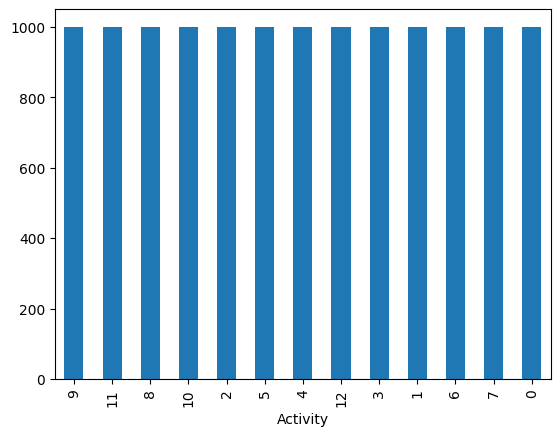

In [161]:
# df_full['Activity'].value_counts().plot(kind= 'bar')
df['Activity'].value_counts().plot(kind= 'bar')

In [162]:
df_numerical = df.drop(['Activity', 'subject'], axis=1)

In [163]:
df_numerical.shape

(13000, 12)

In [164]:
#check for missing data
print('missing values -> {}'.format (df.isna().sum()))  # -> why ??

missing values -> alx         0
aly         0
alz         0
glx         0
gly         0
glz         0
arx         0
ary         0
arz         0
grx         0
gry         0
grz         0
Activity    0
subject     0
dtype: int64


In [165]:
df.dropna(inplace = True)

In [166]:
#check duplicates
print('dubblicate values -> {}'.format (df.duplicated()))

dubblicate values -> 0        False
1        False
2        False
3        False
4        False
         ...  
12995    False
12996    False
12997    False
12998    False
12999    False
Length: 13000, dtype: bool


In [167]:
#drop duplicates
df.drop_duplicates(inplace = True)
#test after remove the duplicates
print(df.duplicated().sum())

0


In [168]:
X.shape

(13000, 12)

In [169]:
X.head()

,alx,aly,alz,glx,gly,glz,arx,ary,arz,grx,gry,grz
0,0.095388,-10.5540,2.0462,0.51020,-0.82364,-0.49902,1.9930,-7.7651,4.48670,0.50980,-1.110900,0.15302
1,5.865200,-19.2490,-1.0913,0.24675,-0.88368,0.32809,-16.2490,5.8967,-0.33017,-0.84510,0.696100,0.14871
2,0.423870,-9.5639,-3.9115,-0.49907,-0.56473,-0.75835,-1.1146,-7.5898,2.01630,-0.58039,-0.858320,-0.18750
3,19.962000,-16.7070,23.3430,0.14657,-0.34522,0.82515,9.0117,-8.2996,1.04340,-0.89412,0.088296,0.60776
4,2.337300,-9.3782,-2.1747,0.34694,-0.28143,0.33988,-8.8481,-3.2863,2.36690,-0.21569,-0.055441,0.82112


In [170]:
y.head()

0     9
1    11
2     8
3    10
4     2
Name: Activity, dtype: int64

In [171]:
X_train, X_test,y_train, y_test = train_test_split(X,y, test_size=0.2, shuffle=True, random_state=0)
X_train = np.asarray(X_train)
y_train = np.asarray(y_train)
X_test = np.asarray(X_test)
y_test = np.asarray(y_test)

In [172]:
#check the traing set size and test set size:
print("Training set size:", len(X_train), "samples")
print("Test set size:", len(X_test), "samples")

Training set size: 10400 samples
Test set size: 2600 samples


In [173]:
#check the traing set shape and test set shape:
print("Training set shape:", X_train.shape, "samples")
print("Test set shape:", X_test.shape, "samples")

Training set shape: (10400, 12) samples
Test set shape: (2600, 12) samples


##3. Model Training (40%)

## KNN

In [174]:
def distance_ecu(x_train, x_test_point):
    distances = []
    for row in range(len(x_train)):
        current_train_point = x_train[row]
        current_distance = 0
        for col in range(len(current_train_point)):
            current_distance += (current_train_point[col] - x_test_point[col]) ** 2
        current_distance = np.sqrt(current_distance)
        distances.append(current_distance)
    distances = pd.DataFrame(data=distances, columns=['index'])
    return distances

def nearest_neighbors(distance_point , k):
    df_nearest = sorted(distance_point)
    df_nearest = df_nearest[:k]
    return df_nearest

def voting(df_nearest , y_train):
    counter_vote  = collections.Counter(y_train[df_nearest])
    y_pred = counter_vote.most_common(1)[0][0]
    return y_pred

In [175]:
def KNN_from_scratch(X_train, y_train, X_test, K):
    y_pred = []
    for i in range(len(X_test)):
          # Loop over all the test set and perform the three steps
        distances = []
        for j in range(len(X_train)):
            distances.append([np.sqrt(np.sum(np.square(X_test[i] - X_train[j]))), j])
        distances.sort(key=lambda x: x[0])
        df_nearest = np.array(distances[:K])[:, 1].astype(int)
        y_pred.append(voting(df_nearest, y_train))
    return y_pred

In [176]:
data_types = df.dtypes
print("Data type of each column:")
print(data_types)

Data type of each column:
alx         float64
aly         float64
alz         float64
glx         float64
gly         float64
glz         float64
arx         float64
ary         float64
arz         float64
grx         float64
gry         float64
grz         float64
Activity      int64
subject      object
dtype: object


In [177]:
# print("\n Before normalization:")
# K = 3
# y_pred_scratch = KNN_from_scratch(X_train, y_train, X_test, K)
# # print(y_pred_scratch)

# accuracy_scratch = accuracy_score(y_test, y_pred_scratch)
# print(f'The accuracy of implementation is {accuracy_scratch*100} %')

# precision = precision_score(y_test, y_pred_scratch, average='micro')
# recall = recall_score(y_test, y_pred_scratch, average='micro')
# f1 = f1_score(y_test, y_pred_scratch, average='micro')

# print("Precision:", precision)
# print("Recall:", recall)
# print("F1 Score:", f1)

In [178]:
# conf_matrix = confusion_matrix(y_test, y_pred_scratch)
# conf_matrix

In [179]:
scale = Normalizer().fit(X_train)
x_train_normalized = scale.transform(X_train)
x_test_normalized = scale.transform(X_test)

In [180]:
# print("After normalization:")
# k = 3
# y_pred_normalized = KNN_from_scratch(x_train_normalized, y_train, x_test_normalized, k)
# # print(y_pred_normalized)

# accuracy_normalized = accuracy_score(y_test, y_pred_normalized)
# print(f'The accuracy of normalized implementation is {accuracy_scratch*100} %')

# precision = precision_score(y_test, y_pred_normalized, average='micro')
# recall = recall_score(y_test, y_pred_normalized, average='micro')
# f1 = f1_score(y_test, y_pred_normalized, average='micro')

# print("Precision:", precision)
# print("Recall:", recall)
# print("F1 Score:", f1)

In [181]:
# conf_matrix = confusion_matrix(y_test, y_pred_normalized)
# conf_matrix

In [182]:
knn = KNeighborsRegressor(n_neighbors=3)
knn.fit(x_train_normalized, y_train)

KNeighborsRegressor(n_neighbors=3)

In [183]:
print("X train before Normalization")
print(X_train[0:5])
print("\nX train after Normalization")
print(x_train_normalized[0:5])

X train before Normalization
[[ 3.4933e+00 -1.3272e+01  5.4442e+00 -4.7495e-01 -4.6154e-01 -9.1749e-01
  -2.0644e-01  6.4839e+00  1.3867e+00 -7.5686e-01 -6.5708e-01 -3.5776e-01]
 [ 1.4863e+00 -6.0447e+00 -8.4332e+00  7.4212e-01 -4.3340e-01 -2.6916e-01
   4.5795e+00 -5.5547e+00  5.5348e+00  1.0686e+00 -6.1191e-01 -2.3922e-01]
 [ 1.6289e+00 -9.5917e+00  2.3462e-01 -6.5121e-01 -2.5141e-01  6.7387e-01
  -2.7972e+00 -9.2401e+00 -1.4090e-02 -7.6667e-01 -2.2998e-01 -3.3405e-01]
 [ 2.6057e+00 -3.5085e+00 -9.2640e+00  7.8850e-01 -3.3771e-02 -6.9941e-01
  -7.7714e+00 -1.6647e+01  2.2614e+00 -1.0000e-01 -8.0493e-01  8.6422e-01]
 [ 3.8226e+00 -8.8943e+00 -7.2502e+00  1.7440e-01 -7.7298e-01 -6.7387e-01
  -2.1526e+01 -1.8593e+01  1.3737e+01 -5.7451e-01 -2.9979e-01  9.5690e-01]]

X train after Normalization
[[ 0.21483184 -0.81620479  0.33480878 -0.02920859 -0.0283839  -0.05642403
  -0.0126957   0.39874851  0.08527963 -0.04654557 -0.04040927 -0.02200161]
 [ 0.10651499 -0.43319057 -0.60436129  0.053183

In [184]:
knn_y_pred = knn.predict(X_test)
knn_y_pred = np.round(knn_y_pred)

Knn_accuracy = accuracy_score(y_test, knn_y_pred)
knn_precision = precision_score(y_test, knn_y_pred, average='micro')
knn_recall = recall_score(y_test, knn_y_pred, average='micro')
knn_f1_score = f1_score(y_test, knn_y_pred, average='micro')
print("Knn_accuracy:", Knn_accuracy)
print("knn_precision:", knn_precision)
print("knn_recall:", knn_recall)
print("F1 knn_f1_score:", knn_f1_score)


Knn_accuracy: 0.6561538461538462
knn_precision: 0.6561538461538462
knn_recall: 0.6561538461538462
F1 knn_f1_score: 0.6561538461538462


##LInear Regression

In [185]:
regression= LinearRegression()
regression.fit(X_train, y_train)

LinearRegression()

In [186]:
regression_pred = regression.predict(X_test)
regression_pred = np.round(regression_pred)
regression_accuracy = accuracy_score(y_test, regression_pred)
print("Regression accuracy:", regression_accuracy)
mse = mean_squared_error(y_test, regression_pred)
print(f'linear regression Mean Squared Error:{mse}')

Regression accuracy: 0.09576923076923077
linear regression Mean Squared Error:10.684615384615384


## SVM

In [187]:
df

,alx,aly,alz,glx,gly,glz,arx,ary,arz,grx,gry,grz,Activity,subject
0,0.095388,-10.5540,2.04620,0.51020,-0.82364,-0.49902,1.99300,-7.7651,4.48670,0.509800,-1.110900,0.153020,9,subject8
1,5.865200,-19.2490,-1.09130,0.24675,-0.88368,0.32809,-16.24900,5.8967,-0.33017,-0.845100,0.696100,0.148710,11,subject8
2,0.423870,-9.5639,-3.91150,-0.49907,-0.56473,-0.75835,-1.11460,-7.5898,2.01630,-0.580390,-0.858320,-0.187500,8,subject4
3,19.962000,-16.7070,23.34300,0.14657,-0.34522,0.82515,9.01170,-8.2996,1.04340,-0.894120,0.088296,0.607760,10,subject6
4,2.337300,-9.3782,-2.17470,0.34694,-0.28143,0.33988,-8.84810,-3.2863,2.36690,-0.215690,-0.055441,0.821120,2,subject8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12995,2.314400,-9.6498,0.36357,-0.21707,-0.87805,-0.51670,-2.97450,-9.2045,1.55020,-0.058824,-0.926080,-0.372840,1,subject1
12996,1.398200,-9.5370,2.73500,-0.25417,-0.91370,-0.44990,-2.73140,-4.5776,0.23987,-0.427450,-0.751540,-0.592670,6,subject6
12997,1.876100,-9.6091,1.46540,0.54545,-0.68480,0.49902,-2.02120,-7.0162,2.37840,-0.127450,-0.815200,0.784480,4,subject3
12998,0.998650,-8.7710,-4.82440,0.45455,-0.76735,0.20432,-1.25910,-5.1066,9.33840,0.784310,-0.308010,0.875000,9,subject3


In [188]:
scaler = StandardScaler().fit(X_train)
x_train_scaled = scaler.transform(X_train)
x_test_scaled = scaler.transform(X_test)

In [189]:
svm = SVC(C=10000, kernel='poly')
svm.fit(x_train_scaled, y_train)

SVC(C=10000, kernel='poly')

In [190]:
svm_y_pred = svm.predict(x_test_scaled)
svm_y_pred = np.round(svm_y_pred)

In [191]:
svm_accuracy = accuracy_score(y_test, svm_y_pred)
svm_precision = precision_score(y_test, svm.predict(X_test), average='micro')
svm_recall = recall_score(y_test, svm.predict(X_test), average='micro')
svm_f1_score = f1_score(y_test, svm.predict(X_test), average='micro')

print("svm_accuracy:", svm_accuracy*100,'%')
print("svm_precision:", svm_precision)
print("svm_recall:", svm_recall)
print("F1 svm_f1_score:", svm_f1_score)

svm_accuracy: 86.76923076923076 %
svm_precision: 0.21384615384615385
svm_recall: 0.21384615384615385
F1 svm_f1_score: 0.21384615384615385


In [192]:
conf_matrix = confusion_matrix(y_test, svm.predict(X_test))
conf_matrix

array([[  4,   1,   0,   4,   8,  22,   0,   1,   0,  12,  19,  29,  97],
       [  0,   0,   0,   0,   0,  36,   0,   0,   0,   0,   0,   0, 152],
       [  0,   0,   0,   0,   0,  18,   0,   0,   0,   0,  53,  46,  90],
       [  0,   0,   0, 186,   0,   0,   0,   0,   0,   0,   0,  11,   0],
       [  1,   0,   0,   0,  29,  24,   0,   0,   0,   1,   8,   3, 130],
       [  2,   0,   0,   0,   5,  35,   0,   0,   0,   0,   3,  14, 142],
       [  0,   0,   0,   0,  12,  66,   0,   0,   0,   0,   0,   1, 144],
       [  2,   2,   2,   0,   0,   3,   0,   9,   0,  45,   4,  40,  87],
       [  0,   0,   0,   0,   8,  40,   0,   0,   0,   0,   5,   7, 133],
       [  8,   0,   0,   0,   1,   8,   0,   5,   0,  64,   4,   2, 114],
       [  4,   0,   1,   0,   7,   0,   0,   0,   0,   6,  54,  86,  30],
       [  7,   1,   0,   2,   3,   1,   1,   0,   1,   1,  47, 105,  34],
       [ 15,   2,   2,   6,  10,   1,   0,   0,   0,  12,  33,  56,  70]])

## Neural Network

In [193]:
min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)

In [194]:
# scaler = StandardScaler().fit(X_train)
# x_train_normalized = scaler.transform(X_train)
# x_test_normalized = scaler.transform(X_test)

In [195]:
X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X_scale, y, test_size=0.3, random_state=1)
X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.5, random_state=1)
print(X_train.shape, X_val.shape, X_test.shape, Y_train.shape, Y_val.shape, Y_test.shape)

(9100, 12) (1950, 12) (1950, 12) (9100,) (1950,) (1950,)


In [196]:
model = Sequential([
    Dense(64, activation='relu', input_shape=(12,)),
    Dense(14, activation='relu'),
    Dense(1, activation='sigmoid'),
])

In [197]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [198]:
df_X_train = pd.DataFrame(Y_train)
df_X_train.value_counts()

Activity
3           728
6           724
9           723
1           705
0           704
5           700
8           696
12          696
11          692
10          689
7           684
4           683
2           676
Name: count, dtype: int64

In [199]:
hist = model.fit(X_train, Y_train,
          batch_size=32,epochs=10,
          validation_data=(X_val, Y_val))

Epoch 1/10
285/285 [==============================] - 2s 3ms/step - loss: -249.1028 - accuracy: 0.0771 - val_loss: -1030.5946 - val_accuracy: 0.0759
Epoch 2/10
285/285 [==============================] - 1s 2ms/step - loss: -3908.8997 - accuracy: 0.0775 - val_loss: -8470.3750 - val_accuracy: 0.0759
Epoch 3/10
285/285 [==============================] - 1s 2ms/step - loss: -16858.4590 - accuracy: 0.0775 - val_loss: -28008.1387 - val_accuracy: 0.0759
Epoch 4/10
285/285 [==============================] - 1s 2ms/step - loss: -44021.1289 - accuracy: 0.0775 - val_loss: -63827.6133 - val_accuracy: 0.0759
Epoch 5/10
285/285 [==============================] - 1s 3ms/step - loss: -89076.9922 - accuracy: 0.0775 - val_loss: -119376.2500 - val_accuracy: 0.0759
Epoch 6/10
285/285 [==============================] - 1s 3ms/step - loss: -154753.0469 - accuracy: 0.0775 - val_loss: -196536.8281 - val_accuracy: 0.0759
Epoch 7/10
285/285 [==============================] - 1s 3ms/step - loss: -242799.4531 - a

In [200]:
y_pred_nn = model.predict(X_test)
y_pred_nn = np.round(y_pred_nn)

61/61 [==============================] - 0s 1ms/step


In [201]:
NN2_precision = precision_score(Y_test, y_pred_nn, average='micro')
NN2_recall = recall_score(Y_test, y_pred_nn, average='micro')
NN2_f1_score = f1_score(Y_test, y_pred_nn, average='micro')
NN2_Accuracy = accuracy_score(Y_test, y_pred_nn)
print("NN2_Accuracy:", NN2_Accuracy)
print("NN2_precision:", NN2_precision)
print("NN2_recall:", NN2_recall)
print("NN2_f1_score:", NN2_f1_score)

print("confusion_matrix:")
conf_matrix = confusion_matrix(Y_test, y_pred_nn)
conf_matrix

NN2_Accuracy: 0.07538461538461538
NN2_precision: 0.07538461538461538
NN2_recall: 0.07538461538461538
NN2_f1_score: 0.07538461538461538
confusion_matrix:


array([[  0, 158,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0, 147,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0, 159,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0, 125,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0, 168,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0, 143,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0, 135,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0, 151,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0, 166,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0, 139,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0, 156,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0, 146,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0, 157,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0]])

##Logistic Regression

In [202]:
df

,alx,aly,alz,glx,gly,glz,arx,ary,arz,grx,gry,grz,Activity,subject
0,0.095388,-10.5540,2.04620,0.51020,-0.82364,-0.49902,1.99300,-7.7651,4.48670,0.509800,-1.110900,0.153020,9,subject8
1,5.865200,-19.2490,-1.09130,0.24675,-0.88368,0.32809,-16.24900,5.8967,-0.33017,-0.845100,0.696100,0.148710,11,subject8
2,0.423870,-9.5639,-3.91150,-0.49907,-0.56473,-0.75835,-1.11460,-7.5898,2.01630,-0.580390,-0.858320,-0.187500,8,subject4
3,19.962000,-16.7070,23.34300,0.14657,-0.34522,0.82515,9.01170,-8.2996,1.04340,-0.894120,0.088296,0.607760,10,subject6
4,2.337300,-9.3782,-2.17470,0.34694,-0.28143,0.33988,-8.84810,-3.2863,2.36690,-0.215690,-0.055441,0.821120,2,subject8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12995,2.314400,-9.6498,0.36357,-0.21707,-0.87805,-0.51670,-2.97450,-9.2045,1.55020,-0.058824,-0.926080,-0.372840,1,subject1
12996,1.398200,-9.5370,2.73500,-0.25417,-0.91370,-0.44990,-2.73140,-4.5776,0.23987,-0.427450,-0.751540,-0.592670,6,subject6
12997,1.876100,-9.6091,1.46540,0.54545,-0.68480,0.49902,-2.02120,-7.0162,2.37840,-0.127450,-0.815200,0.784480,4,subject3
12998,0.998650,-8.7710,-4.82440,0.45455,-0.76735,0.20432,-1.25910,-5.1066,9.33840,0.784310,-0.308010,0.875000,9,subject3


In [203]:
print('Digits dataset structure= ', dir(df)) # dir() function returns all properties and methods of the specified object, without the values.
print('Data shape= ', df.shape)
print('Data conatins pixel representation of each image, \n', df)

Digits dataset structure=  ['Activity', 'T', '_AXIS_LEN', '_AXIS_ORDERS', '_AXIS_TO_AXIS_NUMBER', '_HANDLED_TYPES', '__abs__', '__add__', '__and__', '__annotations__', '__array__', '__array_priority__', '__array_ufunc__', '__bool__', '__class__', '__contains__', '__copy__', '__dataframe__', '__deepcopy__', '__delattr__', '__delitem__', '__dict__', '__dir__', '__divmod__', '__doc__', '__eq__', '__finalize__', '__floordiv__', '__format__', '__ge__', '__getattr__', '__getattribute__', '__getitem__', '__getstate__', '__gt__', '__hash__', '__iadd__', '__iand__', '__ifloordiv__', '__imod__', '__imul__', '__init__', '__init_subclass__', '__invert__', '__ior__', '__ipow__', '__isub__', '__iter__', '__itruediv__', '__ixor__', '__le__', '__len__', '__lt__', '__matmul__', '__mod__', '__module__', '__mul__', '__ne__', '__neg__', '__new__', '__nonzero__', '__or__', '__pos__', '__pow__', '__radd__', '__rand__', '__rdivmod__', '__reduce__', '__reduce_ex__', '__repr__', '__rfloordiv__', '__rmatmul__',

In [204]:
print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of y_train: {y_train.shape}")

Shape of X_train: (9100, 12)
Shape of y_train: (10400,)


In [205]:
y_train = y_train[:X_train.shape[0]]
X_train = X_train[:y_train.shape[0]]

X_test = X_test[:y_test.shape[0]]
y_test = y_test[:X_test.shape[0]]

In [206]:
lm = linear_model.LogisticRegression(multi_class='ovr', solver='liblinear')
lm.fit(X_train, y_train)

LogisticRegression(multi_class='ovr', solver='liblinear')

In [207]:
print('Predicted value is =', lm.predict([X_test[200]]))

Predicted value is = [8]


In [208]:
y_pred = lm.predict(X_test)
LM_accuracy = accuracy_score(y_test, y_pred)
LM_precision = precision_score(y_test, y_pred, average='micro')
LM_recall = recall_score(y_test, y_pred, average='micro')
LM_f1_score = f1_score(y_test, y_pred, average='micro')

print("LM_accuracy:", LM_accuracy)
print("LM_precision:", LM_precision)
print("LM_recall:", LM_recall)
print("LM_f1_score:", LM_f1_score)

LM_accuracy: 0.08461538461538462
LM_precision: 0.08461538461538462
LM_recall: 0.08461538461538462
LM_f1_score: 0.08461538461538462


In [209]:
predictions=lm.predict(X_test)
conf_matrix=confusion_matrix(y_test, predictions)
conf_matrix

array([[ 7,  7, 12,  6, 19,  1,  4, 14, 26,  5, 40,  6, 14],
       [ 8, 10, 10, 16, 22,  5,  3,  4, 23,  4, 21,  5, 14],
       [14,  8, 17,  9, 23,  5,  2, 11, 14,  5, 28,  7, 12],
       [16,  7, 14, 14, 19,  4,  1, 12, 19,  2, 21,  4, 10],
       [ 8,  5, 22, 18, 12,  5,  5,  6, 20,  7, 25,  2, 16],
       [12,  6, 21,  8, 13,  6,  2,  9, 19,  3, 29,  3, 16],
       [11, 15, 22, 11, 23,  6,  3, 18, 22,  1, 25,  2, 10],
       [13,  8, 20, 13, 17,  4,  4, 10, 18,  5, 20,  2, 12],
       [ 9, 11, 15, 13, 12,  8,  2,  7, 30,  2, 26,  1, 11],
       [11, 10, 14, 10, 18,  5,  1,  8, 22,  6, 33,  4, 15],
       [13,  5, 10,  8, 16,  3,  4,  5, 25,  3, 31,  1, 13],
       [14,  7, 19, 13, 13,  4,  7, 11, 16,  4, 24,  4,  9],
       [13,  7, 14,  6, 16,  5,  3, 11, 25,  3, 24,  5, 15]])

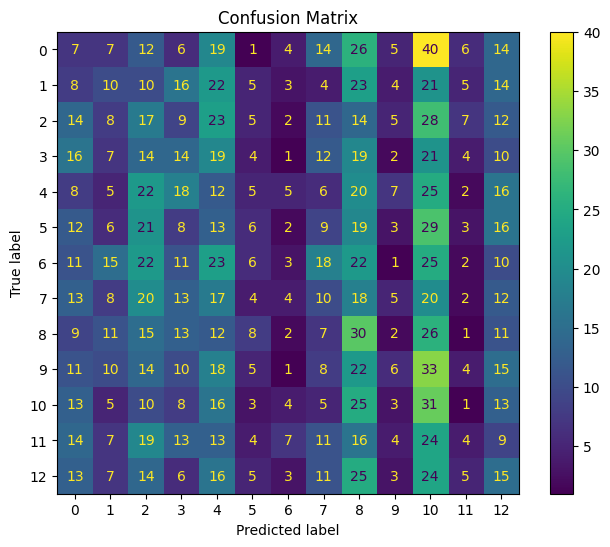

In [210]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

fig, ax = plt.subplots(figsize=(8,6), dpi=100)
display = ConfusionMatrixDisplay(conf_matrix, display_labels=lm.classes_)

# set the plot title using the axes object
ax.set(title='Confusion Matrix')
display.plot(ax=ax);